### Perform clustering for the telcom churn data to obtain optimum number of clusters.

In [34]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


In [5]:
df_telcom = pd.read_excel(r'D:\360digi\DS\Sharath\KMeans_Clustering\handson\Dataset_Assignment Clustering_K Means\Telco_customer_churn.xlsx')
df_telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Quarter                            7043 non-null   object 
 3   Referred a Friend                  7043 non-null   object 
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

### EXPLORATORY DATA ANALYSIS (EDA)

In [6]:
df_telcom.describe()

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,0.0,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,1.0,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,1.0,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,1.0,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,1.0,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,1.0,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [7]:
# The count column mentions the count of customer. Which is '1' for every customer. So we can ignore the column by dropping it from the dataset.
df_telcom.drop(['Count'], axis = 1, inplace = True)

#### Handling duplicate

In [8]:
#Handling duplicates
duplicate = df_telcom.duplicated()
print(duplicate)
sum(duplicate)

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool


0

In [9]:
duplicate.unique()  #No duplicate records exists.

array([False])

#### Missing value analysis

In [10]:
#Check for missing values
df_telcom.isnull().sum() #No missing values

Customer ID                          0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges                        0
Total Refunds            

#### Dividing Categorical and Numerical variables from dataset

In [11]:
df_telcom_num = df_telcom.iloc[:,[3,4,7,11,23,24,25,26,27,28]].copy()
df_telcom_num.head()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,0,1,0.00,8,39.65,39.65,0.00,20,0.00,59.65
1,1,8,48.85,17,80.65,633.30,0.00,0,390.80,1024.10
2,0,18,11.33,52,95.45,1752.55,45.61,0,203.94,1910.88
3,1,25,19.76,12,98.50,2514.50,13.43,0,494.00,2995.07
4,1,37,6.33,14,76.50,2868.15,0.00,0,234.21,3102.36


In [12]:
#extracting column indexes of categorical data

all_col_list = list(np.arange(len(df_telcom.columns)));
col_list = [3,4,7,11,23,24,25,26,27,28];
rem_col = np.setdiff1d(all_col_list,col_list);print(rem_col)

[ 0  1  2  5  6  8  9 10 12 13 14 15 16 17 18 19 20 21 22]


In [13]:
df_telcom_cate = df_telcom.iloc[:,rem_col].copy()
df_telcom_cate.head()

,Customer ID,Quarter,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method
0,8779-QRDMV,Q3,No,None,No,No,Yes,DSL,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal
1,7495-OOKFY,Q3,Yes,Offer E,Yes,Yes,Yes,Fiber Optic,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card
2,1658-BYGOY,Q3,No,Offer D,Yes,Yes,Yes,Fiber Optic,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal
3,4598-XLKNJ,Q3,Yes,Offer C,Yes,No,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal
4,4846-WHAFZ,Q3,Yes,Offer C,Yes,Yes,Yes,Fiber Optic,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal


### Outlier Analysis

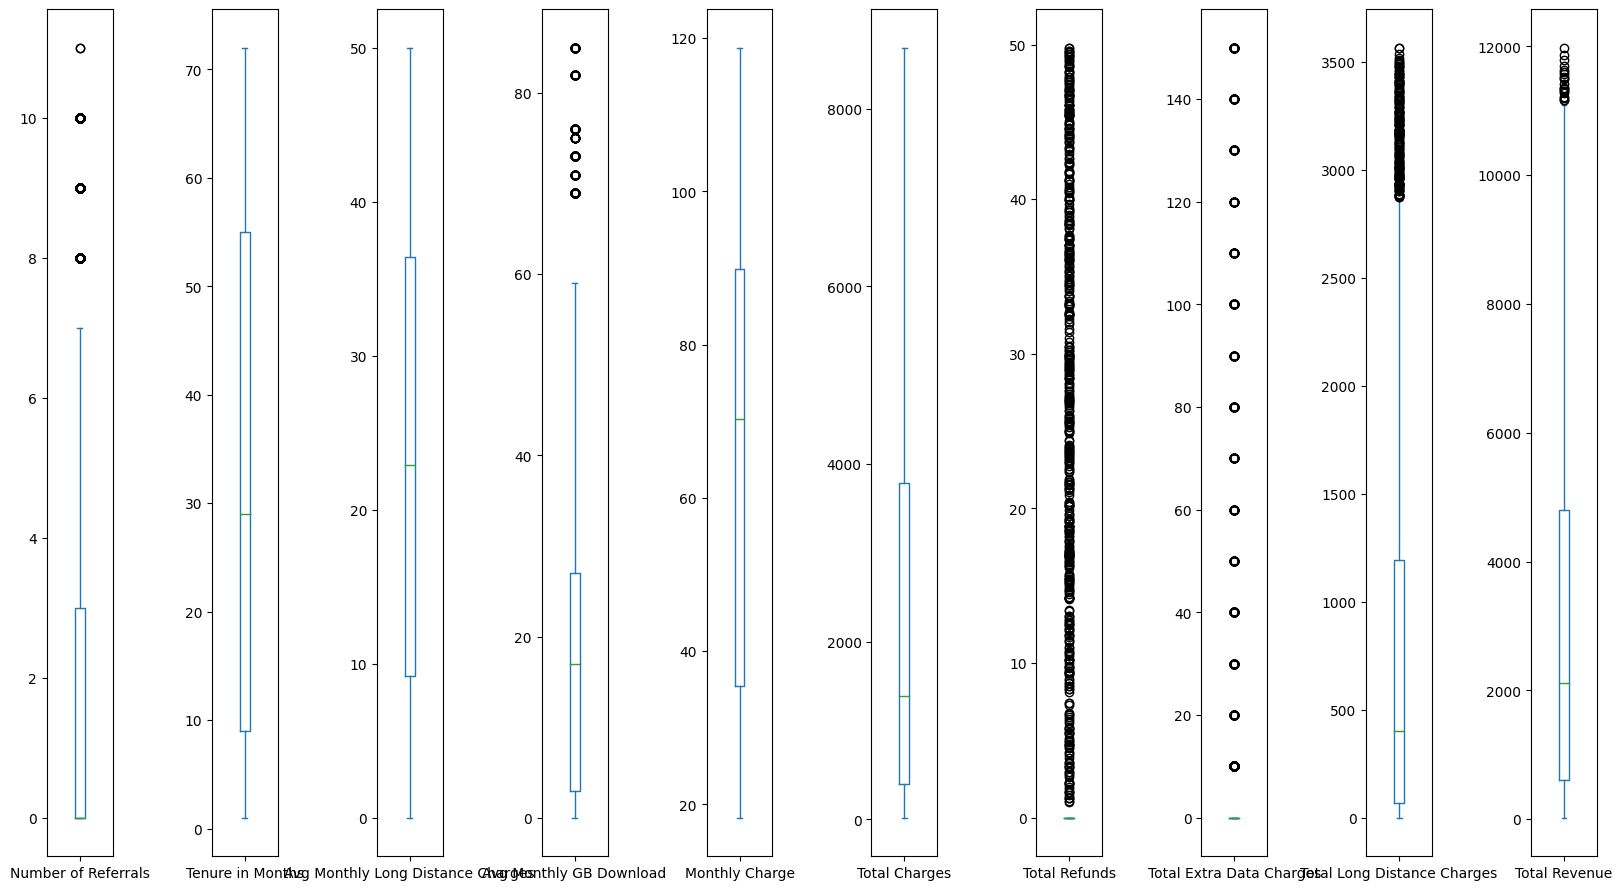

In [14]:
#Box plot visualization to view the outliers.

df_telcom_num.plot(kind = 'box', subplots = True, sharey = False, figsize = (20, 11))

plt.subplots_adjust(wspace = 1.5)
plt.show()


#Number of Referrals, Avg Monthly GB Download, Total Refunds, Total Extra Data Charges, Total Long Distances Charges, Total Revenue columns have outliers


In [15]:
df_telcom_num.columns

Index(['Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

### Winsorization

In [16]:
# Winsorization for "Number of Referrals" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Number of Referrals'])

df_telcom_num['Number of Referrals'] = winsor.fit_transform(df_telcom_num[['Number of Referrals']])


In [17]:
# Winsorization for "Avg Monthly GB Download" column
winsor = Winsorizer(capping_method = 'iqr', tail= 'both', fold = 1.5, variables = ['Avg Monthly GB Download'])

df_telcom_num['Avg Monthly GB Download'] = winsor.fit_transform(df_telcom_num[['Avg Monthly GB Download']])

In [18]:
# Winsorization for "Total Long Distance Charges" column

winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables=['Total Long Distance Charges'])

df_telcom_num['Total Long Distance Charges'] = winsor.fit_transform(df_telcom_num[['Total Long Distance Charges']])

In [19]:
# Winsorization for "Total Revenue" column
winsor = Winsorizer(capping_method = 'iqr', tail =  'both', fold = 1.5, variables = ['Total Revenue'])

df_telcom_num['Total Revenue'] = winsor.fit_transform(df_telcom_num[['Total Revenue']])

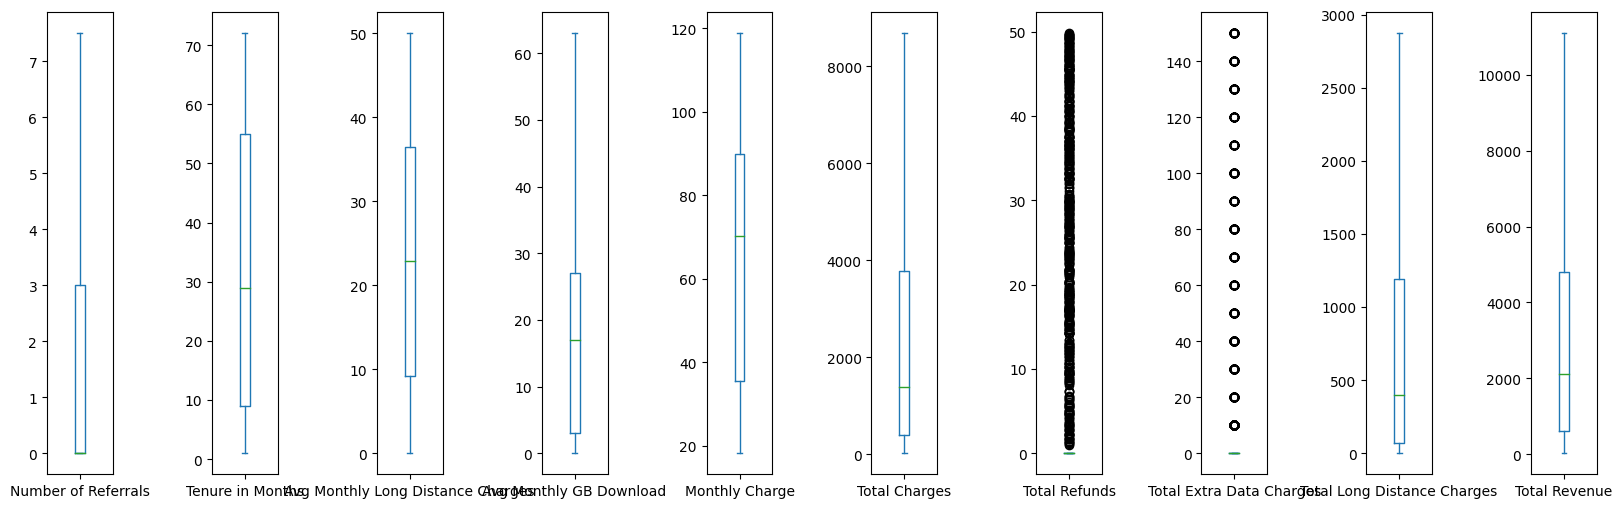

In [20]:
#Box plot visualization to view after the removal of outliers.

df_telcom_num.plot(kind = 'box', subplots = True, sharey = False, figsize = (20, 6))

plt.subplots_adjust(wspace = 1.5)
plt.show()

In [22]:
# Winsorization technique cannot be applied to columns 'Total Refunds, Total Extra Data Charges' because the variation in data is low.
# We consider these columns 'Total Refunds, Total Extra Data Charges' as it is and proceed to scale the data.

In [23]:
# Zero and near zero variance
df_telcom_num.var()

Number of Referrals                  7.081039e+00
Tenure in Months                     6.023128e+02
Avg Monthly Long Distance Charges    2.386442e+02
Avg Monthly GB Download              3.542979e+02
Monthly Charge                       9.054109e+02
Total Charges                        5.135755e+06
Total Refunds                        6.245131e+01
Total Extra Data Charges             6.302599e+02
Total Long Distance Charges          6.783791e+05
Total Revenue                        8.190948e+06
dtype: float64

### Dummy variable creation for categorical data

In [24]:
df_telcom_cate.dtypes

Customer ID               object
Quarter                   object
Referred a Friend         object
Offer                     object
Phone Service             object
Multiple Lines            object
Internet Service          object
Internet Type             object
Online Security           object
Online Backup             object
Device Protection Plan    object
Premium Tech Support      object
Streaming TV              object
Streaming Movies          object
Streaming Music           object
Unlimited Data            object
Contract                  object
Paperless Billing         object
Payment Method            object
dtype: object

In [25]:
df_telcom_cate.shape

(7043, 19)

In [26]:
df_telcom_cate.columns

Index(['Customer ID', 'Quarter', 'Referred a Friend', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method'],
      dtype='object')

In [27]:
# Applying One-Hot Encoding with get_dummies

df_telcom_cate = pd.get_dummies(df_telcom_cate, columns = ['Referred a Friend', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method'], drop_first = True)

In [28]:
df_telcom_cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer ID                  7043 non-null   object
 1   Quarter                      7043 non-null   object
 2   Referred a Friend_Yes        7043 non-null   uint8 
 3   Offer_Offer A                7043 non-null   uint8 
 4   Offer_Offer B                7043 non-null   uint8 
 5   Offer_Offer C                7043 non-null   uint8 
 6   Offer_Offer D                7043 non-null   uint8 
 7   Offer_Offer E                7043 non-null   uint8 
 8   Phone Service_Yes            7043 non-null   uint8 
 9   Multiple Lines_Yes           7043 non-null   uint8 
 10  Internet Service_Yes         7043 non-null   uint8 
 11  Internet Type_DSL            7043 non-null   uint8 
 12  Internet Type_Fiber Optic    7043 non-null   uint8 
 13  Internet Type_None           7043

In [29]:
df_telcom_cate.head()

,Customer ID,Quarter,Referred a Friend_Yes,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Phone Service_Yes,Multiple Lines_Yes,...,Premium Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,Streaming Music_Yes,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check
0,8779-QRDMV,Q3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,7495-OOKFY,Q3,1,0,0,0,0,1,1,1,...,0,0,0,0,1,0,0,1,1,0
2,1658-BYGOY,Q3,0,0,0,0,1,0,1,1,...,0,1,1,1,1,0,0,1,0,0
3,4598-XLKNJ,Q3,1,0,0,1,0,0,1,0,...,0,1,1,0,1,0,0,1,0,0
4,4846-WHAFZ,Q3,1,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0


In [30]:
df_telcom_cate.shape

(7043, 27)

In [31]:
#Concatenate the entire data
df_new = pd.concat([df_telcom_cate, df_telcom_num], axis = 1)
df_new.head()

,Customer ID,Quarter,Referred a Friend_Yes,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Phone Service_Yes,Multiple Lines_Yes,...,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,Q3,0,0,0,0,0,0,0,0,...,0.0,1,0.00,8.0,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,Q3,1,0,0,0,0,1,1,1,...,1.0,8,48.85,17.0,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,Q3,0,0,0,0,1,0,1,1,...,0.0,18,11.33,52.0,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,Q3,1,0,0,1,0,0,1,0,...,1.0,25,19.76,12.0,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,Q3,1,0,0,1,0,0,1,1,...,1.0,37,6.33,14.0,76.50,2868.15,0.00,0,234.21,3102.36


In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Quarter                            7043 non-null   object 
 2   Referred a Friend_Yes              7043 non-null   uint8  
 3   Offer_Offer A                      7043 non-null   uint8  
 4   Offer_Offer B                      7043 non-null   uint8  
 5   Offer_Offer C                      7043 non-null   uint8  
 6   Offer_Offer D                      7043 non-null   uint8  
 7   Offer_Offer E                      7043 non-null   uint8  
 8   Phone Service_Yes                  7043 non-null   uint8  
 9   Multiple Lines_Yes                 7043 non-null   uint8  
 10  Internet Service_Yes               7043 non-null   uint8  
 11  Internet Type_DSL                  7043 non-null   uint8

## Normalization

In [40]:
def norm_func(i):
  x =(i - i.min()) / (i.max() - i.min())
  return(x)

In [42]:
df_norm = norm_func(df_new.iloc[:, 2:])

In [43]:
df_norm.describe()

,Referred a Friend_Yes,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Phone Service_Yes,Multiple Lines_Yes,Internet Service_Yes,Internet Type_DSL,...,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.457476,0.073832,0.116996,0.058924,0.085475,0.114298,0.903166,0.421837,0.783331,0.234559,...,0.240788,0.442067,0.459271,0.315718,0.462803,0.260972,0.039409,0.045738,0.257967,0.272003
std,0.498224,0.261516,0.321438,0.235499,0.279607,0.318195,0.295752,0.493888,0.412004,0.423753,...,0.354803,0.345663,0.309024,0.298775,0.299403,0.261507,0.158719,0.167367,0.286789,0.258463
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.112676,0.184237,0.047619,0.171642,0.044005,0.000000,0.000000,0.024564,0.052763
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.394366,0.457892,0.269841,0.518408,0.158753,0.000000,0.000000,0.139780,0.188500
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.400000,0.760563,0.728046,0.428571,0.712438,0.434780,0.000000,0.000000,0.414738,0.431658
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Clustering Model Building

## KMeans Clustering

In [44]:
# Libraries for creating scree plot or elbow curve 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [45]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

TWSS

[30330.10921627133,
 26550.18402197815,
 24751.863800558353,
 23742.49221296217,
 22897.989518326744,
 22300.869063925555,
 21676.334704947185]

### Creating a scree plot to find out no.of cluster

Text(0, 0.5, 'total_within_SS')

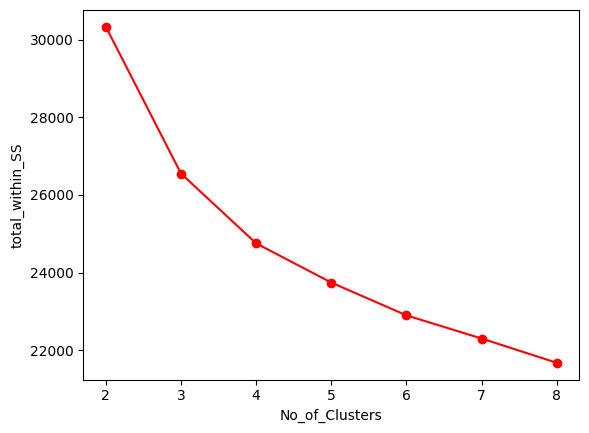

In [46]:
plt.plot(k, TWSS, 'ro-'); plt.xlabel("No_of_Clusters"); plt.ylabel("total_within_SS")

### Using KneeLocator

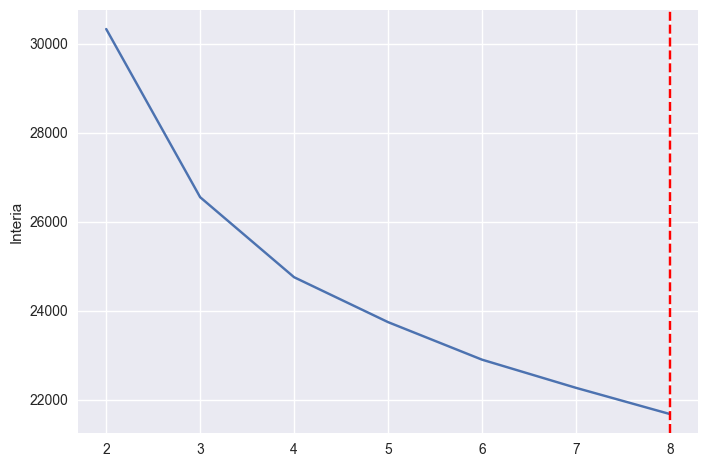

In [47]:
List = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters = k, init = "random", max_iter = 30, random_state = 1, n_init = 10) 
    kmeans.fit(df_norm)
    List.append(kmeans.inertia_)

    
# Refer the link to understand the parameters used: https://kneed.readthedocs.io/en/stable/parameters.html    
from kneed import KneeLocator
kl = KneeLocator(range(2, 9), List, curve = 'convex') 
# The line is pretty linear hence Kneelocator is not able to detect the knee/elbow appropriately
kl.elbow
plt.style.use("seaborn")
plt.plot(range(2, 9), List)
plt.xticks(range(2, 9))
plt.ylabel("Interia")
plt.axvline(x = kl.elbow, color = 'r', label = 'axvline - full height', ls = '--')
plt.show()

#### Detecting the best k=3 using TWSS value from scree plot.

In [48]:
model = KMeans(n_clusters = 3)
yy = model.fit(df_norm)

In [49]:
model.labels_

array([1, 1, 1, ..., 0, 1, 0])

In [50]:
mb = pd.Series(model.labels_)

In [57]:
df_new['cluster'] = mb

In [58]:
df_new

,Customer ID,Quarter,Referred a Friend_Yes,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Phone Service_Yes,Multiple Lines_Yes,...,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,cluster
0,8779-QRDMV,Q3,0,0,0,0,0,0,0,0,...,1,0.00,8.0,39.65,39.65,0.00,20,0.00,59.65,1
1,7495-OOKFY,Q3,1,0,0,0,0,1,1,1,...,8,48.85,17.0,80.65,633.30,0.00,0,390.80,1024.10,1
2,1658-BYGOY,Q3,0,0,0,0,1,0,1,1,...,18,11.33,52.0,95.45,1752.55,45.61,0,203.94,1910.88,1
3,4598-XLKNJ,Q3,1,0,0,1,0,0,1,0,...,25,19.76,12.0,98.50,2514.50,13.43,0,494.00,2995.07,0
4,4846-WHAFZ,Q3,1,0,0,1,0,0,1,1,...,37,6.33,14.0,76.50,2868.15,0.00,0,234.21,3102.36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Q3,0,0,0,0,0,0,1,0,...,72,22.77,0.0,21.15,1419.40,19.31,0,1639.44,3039.53,2
7039,6840-RESVB,Q3,1,0,0,1,0,0,1,1,...,24,36.05,24.0,84.80,1990.50,48.23,0,865.20,2807.47,0
7040,2234-XADUH,Q3,1,0,0,0,0,0,1,1,...,72,29.66,59.0,103.20,7362.90,45.38,0,2135.52,9453.04,0
7041,4801-JZAZL,Q3,1,0,0,0,0,0,0,0,...,11,0.00,17.0,29.60,346.45,27.24,0,0.00,319.21,1


In [63]:
x = df_new.iloc[:, 2:].values

In [64]:
x

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.96500e+01, 1.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 3.90800e+02,
        1.02410e+03, 1.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.03940e+02,
        1.91088e+03, 1.00000e+00],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.13552e+03,
        9.45304e+03, 0.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.19210e+02, 1.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.04336e+03,
        8.88786e+03, 0.00000e+00]])

### 3D Scatter plot

<IPython.core.display.Javascript object>


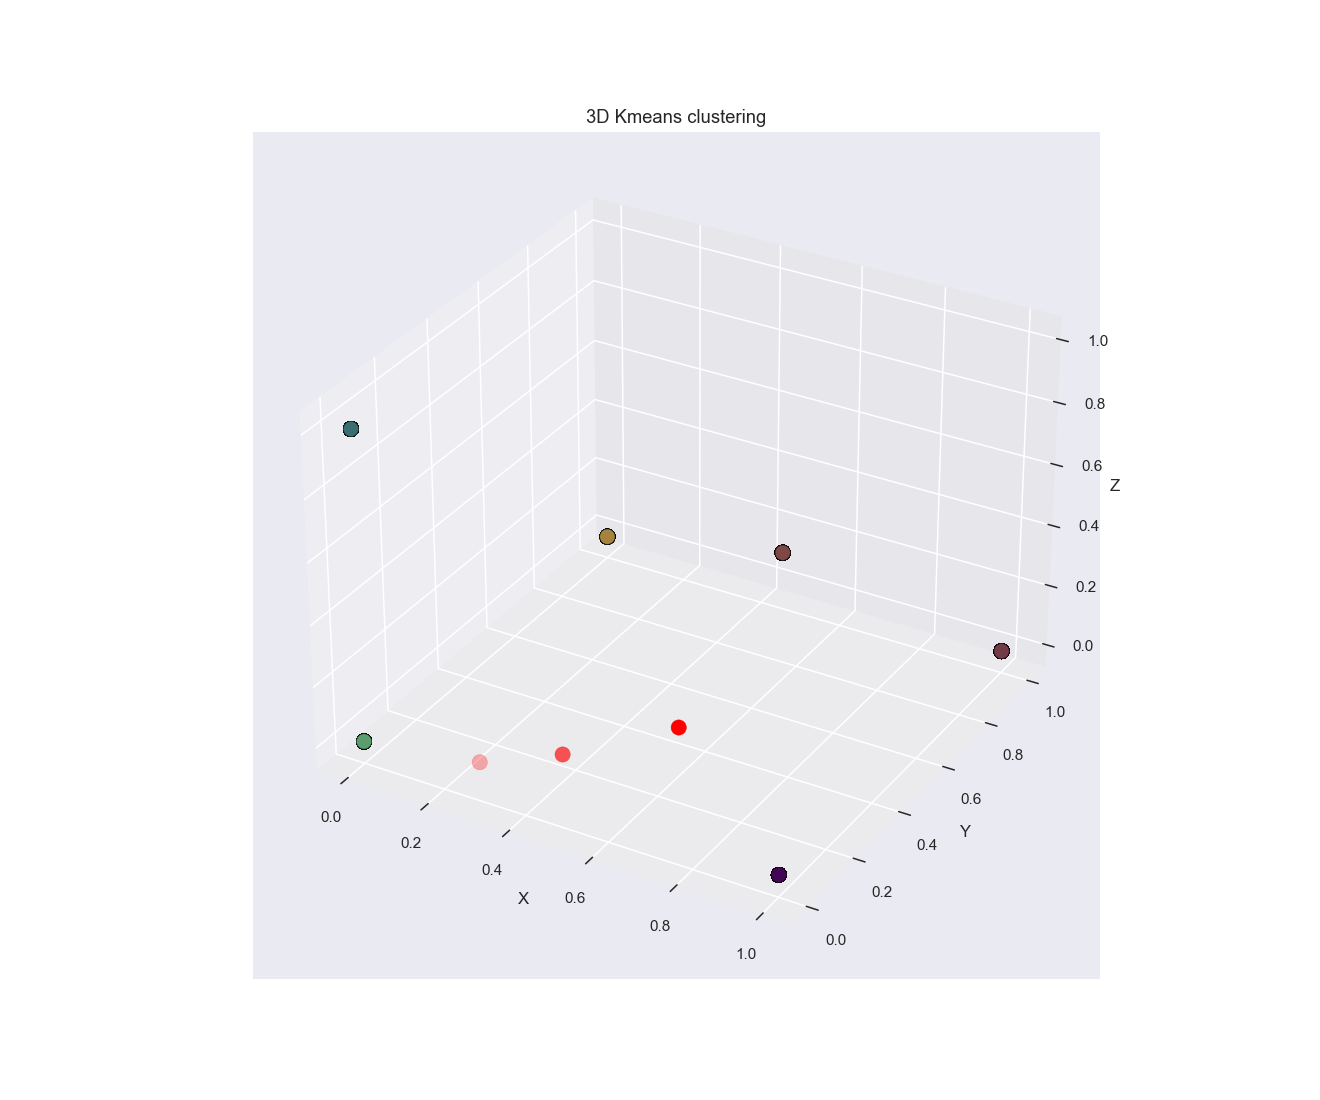

In [65]:
# plot clusters and centroids
%matplotlib notebook
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(111, projection = '3d')
#syntax
##ax.scatter(x , y , z , c = , cmap = , marker = , edgecolor = , s = , alpha)
ax.scatter(x[:,0], x[:,1], x[:,2], c=model.labels_, cmap='viridis', marker='o', edgecolor='k', s = 100, alpha = 0.5)
ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], model.cluster_centers_[:,2], s = 100, c = 'r', marker='o', label = 'Centroid')
ax.set_title("3D Kmeans clustering")
ax.set_xlabel("X")
ax.set_ylabel("Y")   
ax.set_zlabel("Z")
plt.show()

## Cluster Evaluation

#### Silhouette coefficient:

In [68]:
from sklearn import metrics

In [69]:
metrics.silhouette_score(df_norm, model.labels_)

0.16306695749353045

#### Calinski Harabasz:

In [70]:
metrics.calinski_harabasz_score(df_norm, model.labels_)

1357.6176749965286

#### Davies-Bouldin Index:

In [71]:
metrics.davies_bouldin_score(df_norm,model.labels_)

2.1749844122448985

## Evaluation of Number of Clusters using Silhouette Coefficient Technique

In [72]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range (2, 11):
    kmeans = KMeans(n_clusters = k, init = "random", random_state = 1)
    kmeans.fit(df_norm)
    score = silhouette_score(df_norm, kmeans.labels_)
    k = k
    Sil_coff = score
    silhouette_coefficients.append([k, Sil_coff])

In [73]:
silhouette_coefficients

[[2, 0.17786781750285288],
 [3, 0.16317475549577815],
 [4, 0.16213138936588262],
 [5, 0.14723516152657468],
 [6, 0.14337035244039673],
 [7, 0.10813758721871033],
 [8, 0.10700335549854875],
 [9, 0.10973213217961844],
 [10, 0.10630517337218788]]

In [74]:
sorted(silhouette_coefficients, reverse = True, key = lambda x: x[1])

[[2, 0.17786781750285288],
 [3, 0.16317475549577815],
 [4, 0.16213138936588262],
 [5, 0.14723516152657468],
 [6, 0.14337035244039673],
 [9, 0.10973213217961844],
 [7, 0.10813758721871033],
 [8, 0.10700335549854875],
 [10, 0.10630517337218788]]

### Silhouette Coeffficients shows, the number of clusters k = 2 as the best value.

In [75]:
from clusteval import clusteval
import numpy as np

# Cluster evaluation.
ce = clusteval(cluster = 'kmeans', evaluate = 'silhouette', max_clust = 10)

In [76]:
df_array = np.array(df_norm)

In [77]:
df_array.shape

(7043, 35)


[clusteval] >Fit using kmeans with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:09<00:00,  1.16s/it]

[clusteval] >Optimal number clusters detected: [2].
[clusteval] >Fin.


<IPython.core.display.Javascript object>


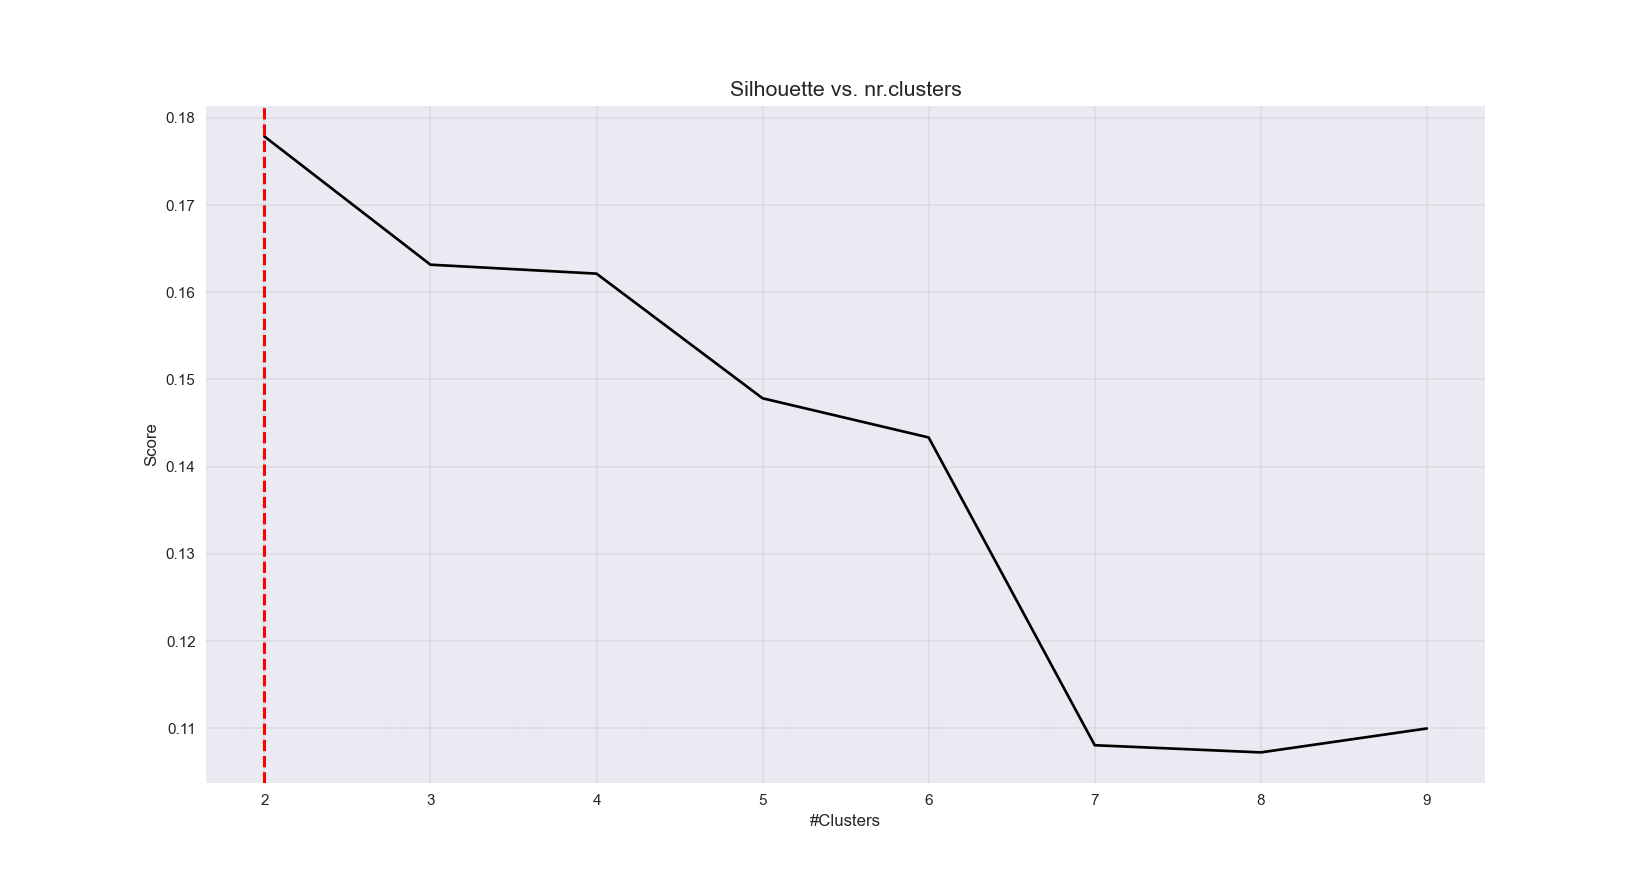

(<Figure size 1500x800 with 1 Axes>,
 <AxesSubplot:title={'center':'Silhouette vs. nr.clusters'}, xlabel='#Clusters', ylabel='Score'>)

In [78]:
# Fit
ce.fit(df_array)

# Plot
ce.plot()

[clusteval] >Estimated number of n_clusters: 1, average silhouette_score=0.178


<IPython.core.display.Javascript object>


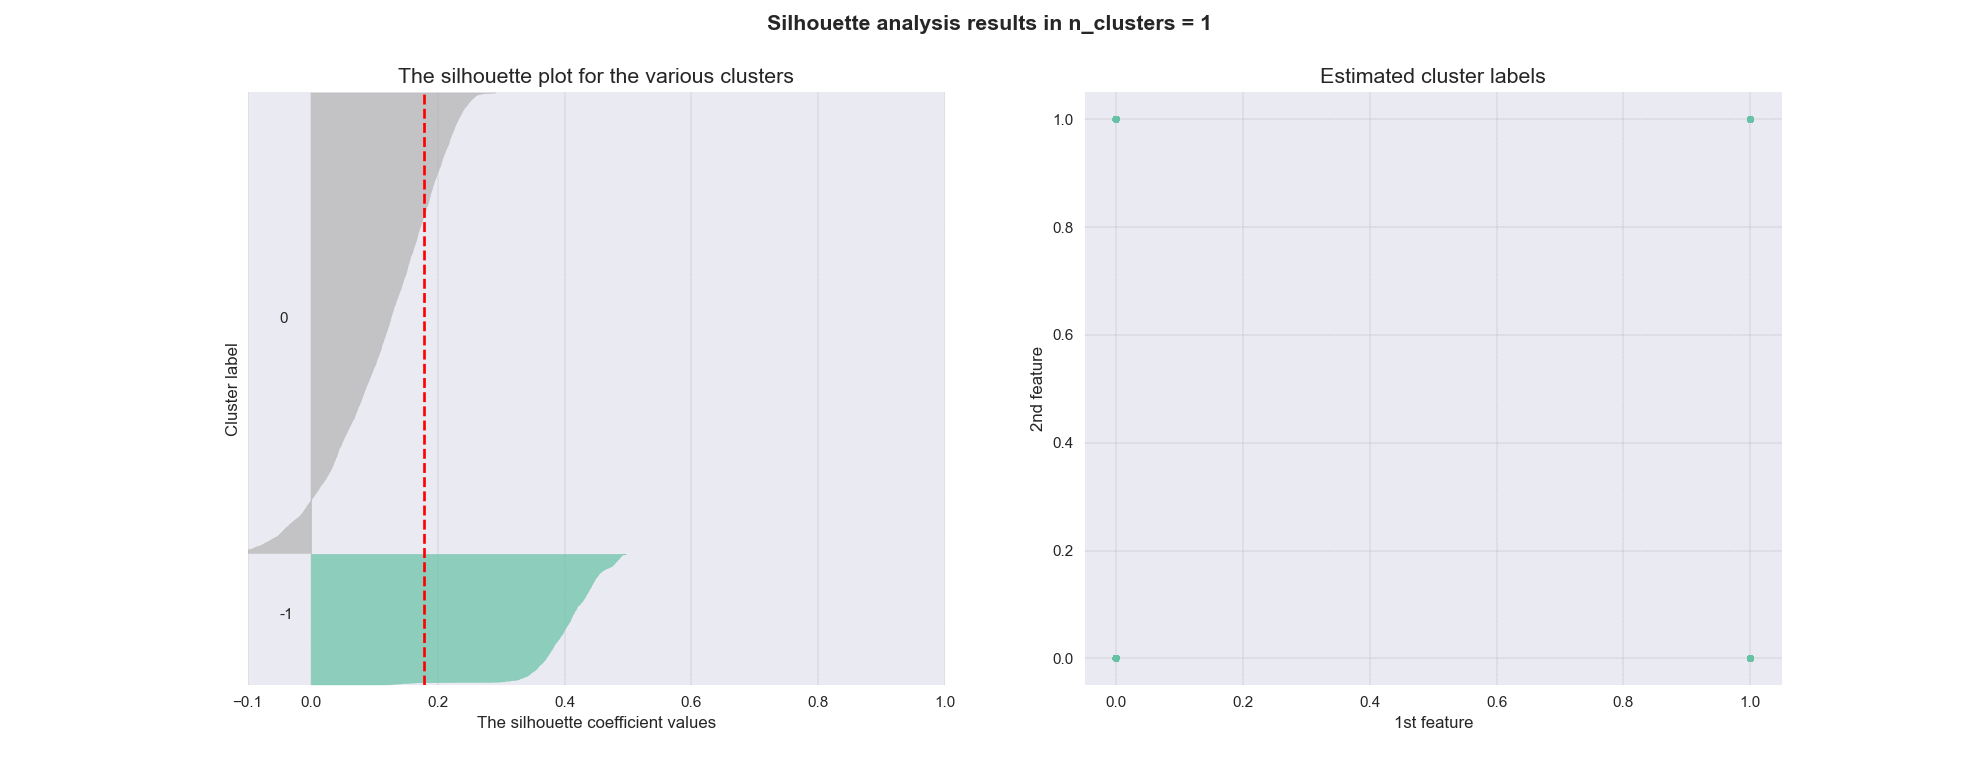

(<Figure size 1800x700 with 2 Axes>,
 <AxesSubplot:title={'center':'The silhouette plot for the various clusters'}, xlabel='The silhouette coefficient values', ylabel='Cluster label'>,
 <AxesSubplot:title={'center':'Estimated cluster labels'}, xlabel='1st feature', ylabel='2nd feature'>)

In [79]:
# Plot
ce.scatter(df_array)

In [81]:
## Using the report from clusteval library building 2 clusters

# Applying KMeans with = 2 as clusters

kc_2 = KMeans(n_clusters = 2)

y_kc_2 = kc_2.fit_predict(df_norm)
y_kc_2

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
kc_2.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
cluster_labels2 = pd.Series(kc_2.labels_) 

In [95]:
df_2clust = pd.concat([cluster_labels2, df_telcom_num], axis = 1) # Imputed data

df_2clust.head()

,0,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,0,0.0,1,0.00,8.0,39.65,39.65,0.00,20,0.00,59.65
1,0,1.0,8,48.85,17.0,80.65,633.30,0.00,0,390.80,1024.10
2,0,0.0,18,11.33,52.0,95.45,1752.55,45.61,0,203.94,1910.88
3,0,1.0,25,19.76,12.0,98.50,2514.50,13.43,0,494.00,2995.07
4,0,1.0,37,6.33,14.0,76.50,2868.15,0.00,0,234.21,3102.36


In [96]:
df_2clust = df_2clust.rename(columns = {0:'cluster'})
df_2clust.head()

,cluster,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,0,0.0,1,0.00,8.0,39.65,39.65,0.00,20,0.00,59.65
1,0,1.0,8,48.85,17.0,80.65,633.30,0.00,0,390.80,1024.10
2,0,0.0,18,11.33,52.0,95.45,1752.55,45.61,0,203.94,1910.88
3,0,1.0,25,19.76,12.0,98.50,2514.50,13.43,0,494.00,2995.07
4,0,1.0,37,6.33,14.0,76.50,2868.15,0.00,0,234.21,3102.36


In [97]:
# Aggregate mean of each cluster
df_2clust.iloc[:,:].groupby(df_2clust.cluster).mean()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
cluster,,,,,,,,,,
0,1.760255,33.016955,22.437092,25.433546,77.038678,2741.071677,2.044365,8.517776,738.201055,3492.773092
1,1.966624,30.168164,24.796187,0.374840,21.540083,658.502625,1.672856,1.026958,750.242988,1415.570982
